In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [2]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6174 non-null   int64  
 1   ontology             6174 non-null   object 
 2   failed               6174 non-null   bool   
 3   failed_repair        4877 non-null   object 
 4   steps                4400 non-null   float64
 5   time                 4400 non-null   float64
 6   calls                4400 non-null   float64
 7   iic_mcs              4358 non-null   float64
 8   iic_remove           4348 non-null   float64
 9   inf_mcs              4358 non-null   float64
 10  inf_weakening        4358 non-null   float64
 11  inf_remove           4348 non-null   float64
 12  failed_enhance       4400 non-null   object 
 13  steps_enhance        4340 non-null   float64
 14  time_enhance         4340 non-null   float64
 15  calls_enhance        4340 non-null   f

,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove,steps_enhance,...,eiic_mcs,eiic_remove,einf_mcs,einf_weakening,einf_remove,einf_enhance,eiic_enhance_weaken,eiic_enhance_mcs,eiic_enhance_remove,eiic_mcs_remove
count,6174.000000,4400.000000,4400.000000,4400.000000,4358.000000,4348.000000,4358.000000,4358.000000,4348.000000,4340.000000,...,4037.000000,4027.000000,4037.000000,4037.000000,4027.000000,4003.000000,4003.000000,4003.000000,3993.000000,4027.000000
mean,3086.500000,2.437500,6760.947500,6746.289091,0.515399,0.595590,2718.612207,2743.865764,2669.261270,14.066129,...,0.557575,0.627679,19588.284122,19625.527372,19444.951825,20249.139895,0.591522,0.653153,0.710733,0.505084
std,1782.424613,5.897372,22399.376864,8113.250815,0.365929,0.332961,3164.818618,3265.417304,3193.365252,51.826790,...,0.335445,0.322733,18590.004938,18839.243711,18680.908406,19363.923356,0.321487,0.334075,0.320259,0.295416
min,0.000000,1.000000,605.000000,535.000000,0.000000,0.000000,120.000000,117.000000,117.000000,1.000000,...,0.000000,0.000000,362.000000,364.000000,362.000000,372.000000,0.000000,0.000000,0.000000,0.000000
25%,1543.250000,1.000000,1430.000000,2142.500000,0.134342,0.500000,444.250000,406.250000,393.000000,1.000000,...,0.304567,0.500000,7850.000000,7581.000000,7529.500000,7833.000000,0.360683,0.435659,0.500000,0.298141
50%,3086.500000,1.000000,2143.500000,3934.500000,0.500000,0.500000,875.000000,875.000000,875.000000,2.000000,...,0.500000,0.501012,14334.000000,14500.000000,14102.000000,14884.000000,0.600000,0.736089,0.836300,0.500000
75%,4629.750000,2.000000,3805.500000,8165.500000,0.900000,0.997990,5288.750000,5427.000000,5159.250000,7.000000,...,0.890789,1.000000,25080.000000,24872.000000,24720.500000,25900.500000,0.900270,0.985611,1.000000,0.698750
max,6173.000000,143.000000,289736.000000,112949.000000,1.000000,1.000000,18006.000000,17766.000000,17766.000000,1028.000000,...,1.000000,1.000000,134602.000000,141249.000000,141249.000000,141249.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred (MCS)'] = repair_data['inf_mcs']
repair_data['Inferred (removal)'] = repair_data['inf_remove']
repair_data['Weakening steps v2'] = repair_data['steps_enhance']
repair_data['Repair time [ms] v2'] = repair_data['time_enhance']
repair_data['Reasoner calls v2'] = repair_data['calls_enhance']
repair_data['Inferred (weakening v2)'] = repair_data['inf_enhance']
repair_data['v2 IIC w.r.t. maximal consistent subset'] = repair_data['iic_enhance_mcs']
repair_data['v2 IIC w.r.t. repair by removal'] = repair_data['iic_enhance_remove']
repair_data['v2 IIC w.r.t. weakening'] = repair_data['iic_enhance_weaken']
repair_data['MCS IIC w.r.t. removal'] = repair_data['iic_mcs_remove']
repair_data['Inf+ (weakening v2)'] = repair_data['einf_enhance']
repair_data['Inf+ (weakening)'] = repair_data['einf_weakening']
repair_data['Inf+ (MCS)'] = repair_data['einf_mcs']
repair_data['Inf+ (removal)'] = repair_data['einf_remove']
repair_data['v2 IIC+ w.r.t. maximal consistent subset'] = repair_data['eiic_enhance_mcs']
repair_data['v2 IIC+ w.r.t. repair by removal'] = repair_data['eiic_enhance_remove']
repair_data['v2 IIC+ w.r.t. weakening'] = repair_data['eiic_enhance_weaken']
repair_data['IIC+ w.r.t. maximal consistent subset'] = repair_data['eiic_mcs']
repair_data['IIC+ w.r.t. repair by removal'] = repair_data['eiic_remove']
repair_data['MCS IIC+ w.r.t. removal'] = repair_data['eiic_mcs_remove']

In [4]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [5]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

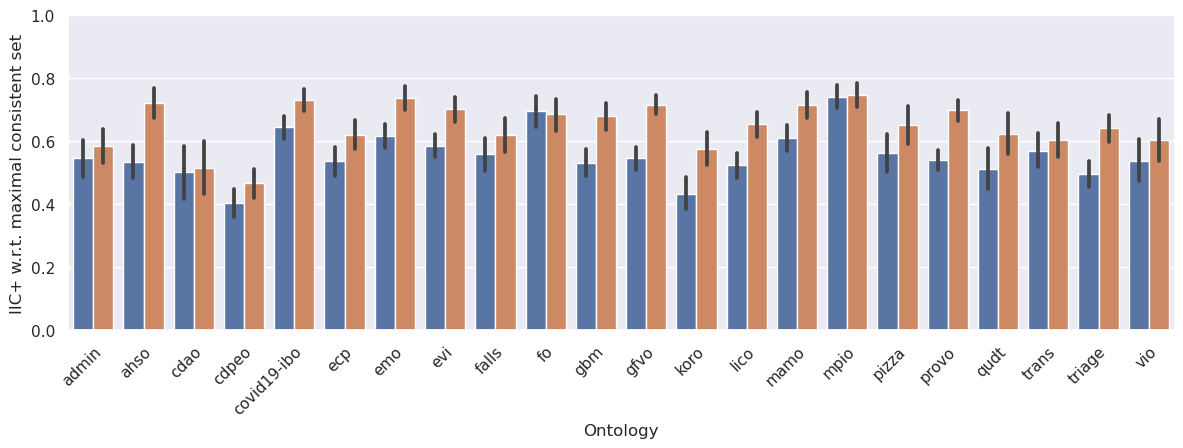

In [6]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data.melt(['Ontology'], ['IIC+ w.r.t. maximal consistent subset', 'v2 IIC+ w.r.t. maximal consistent subset'],
                                'Algorithm', 'IIC+ w.r.t. maximal consistent set'),
            kind='bar', x='Ontology', y='IIC+ w.r.t. maximal consistent set', height=4, aspect=3, hue='Algorithm', order=order, legend=False, n_boot=5_000)
plt.ylim((0, 1))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-both-mcs-ontology-bar.png', dpi=100, bbox_inches="tight")

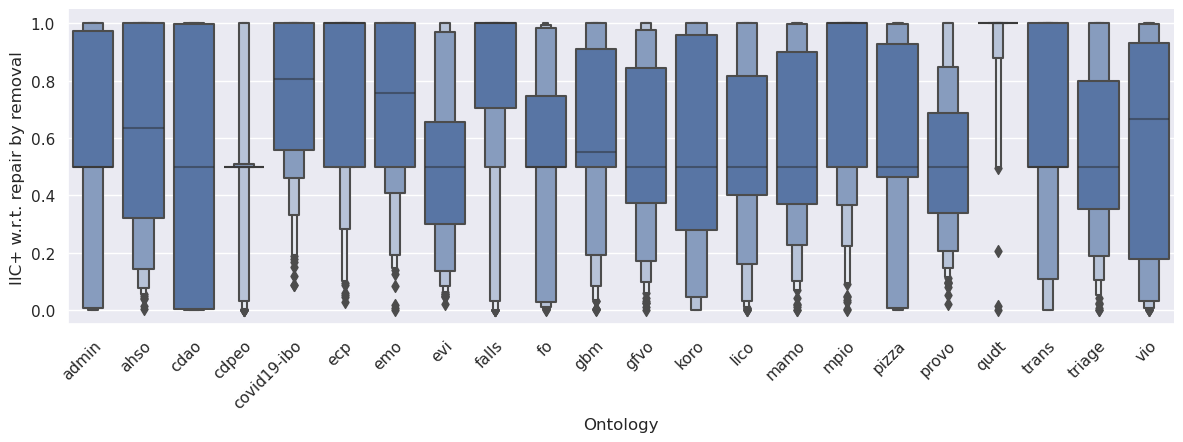

In [7]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC+ w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-remove-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.56, (0.51, 0.6)), 'ahso': (0.63, (0.57, 0.68)), 'cdao': (0.51, (0.42, 0.6)), 'cdpeo': (0.51, (0.48, 0.55)), 'covid19-ibo': (0.75, (0.71, 0.79)), 'ecp': (0.8, (0.75, 0.85)), 'emo': (0.71, (0.66, 0.75)), 'evi': (0.5, (0.46, 0.55)), 'falls': (0.82, (0.77, 0.86)), 'fo': (0.54, (0.49, 0.59)), 'gbm': (0.62, (0.57, 0.66)), 'gfvo': (0.56, (0.51, 0.6)), 'koro': (0.59, (0.53, 0.64)), 'lico': (0.55, (0.51, 0.6)), 'mamo': (0.59, (0.54, 0.63)), 'mpio': (0.78, (0.73, 0.83)), 'pizza': (0.55, (0.49, 0.61)), 'provo': (0.53, (0.49, 0.57)), 'qudt': (0.96, (0.93, 0.99)), 'trans': (0.6, (0.55, 0.65)), 'triage': (0.54, (0.5, 0.59)), 'vio': (0.57, (0.5, 0.64))}


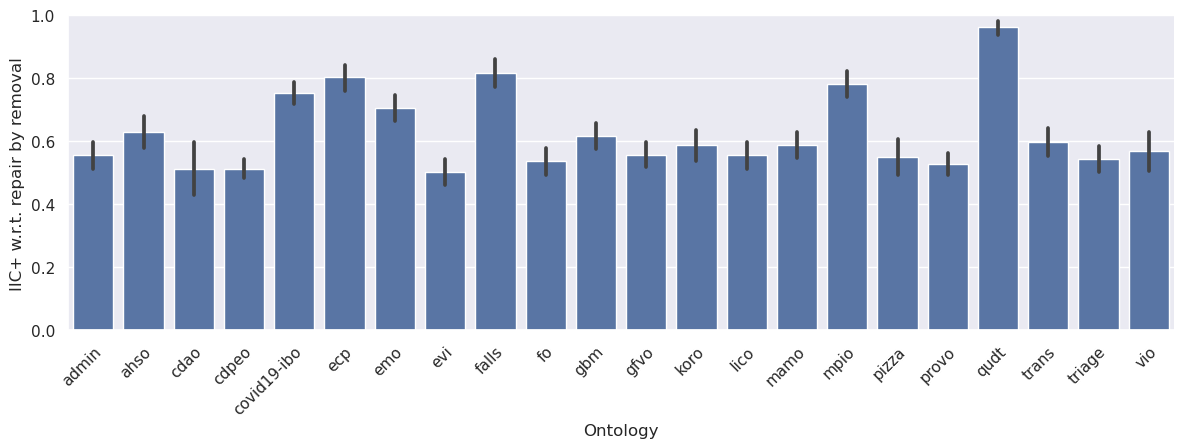

In [8]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC+ w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/eiic-remove-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['eiic_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (0.55, (0.48, 0.61)), 'ahso': (0.54, (0.48, 0.59)), 'cdao': (0.5, (0.41, 0.59)), 'cdpeo': (0.4, (0.36, 0.45)), 'covid19-ibo': (0.64, (0.6, 0.69)), 'ecp': (0.54, (0.49, 0.59)), 'emo': (0.62, (0.57, 0.66)), 'evi': (0.59, (0.54, 0.63)), 'falls': (0.56, (0.5, 0.62)), 'fo': (0.7, (0.64, 0.75)), 'gbm': (0.53, (0.49, 0.58)), 'gfvo': (0.55, (0.51, 0.59)), 'koro': (0.43, (0.38, 0.49)), 'lico': (0.52, (0.48, 0.57)), 'mamo': (0.61, (0.56, 0.66)), 'mpio': (0.74, (0.7, 0.78)), 'pizza': (0.56, (0.5, 0.63)), 'provo': (0.54, (0.5, 0.58)), 'qudt': (0.51, (0.45, 0.58)), 'trans': (0.57, (0.51, 0.63)), 'triage': (0.5, (0.45, 0.54)), 'vio': (0.54, (0.47, 0.61))}


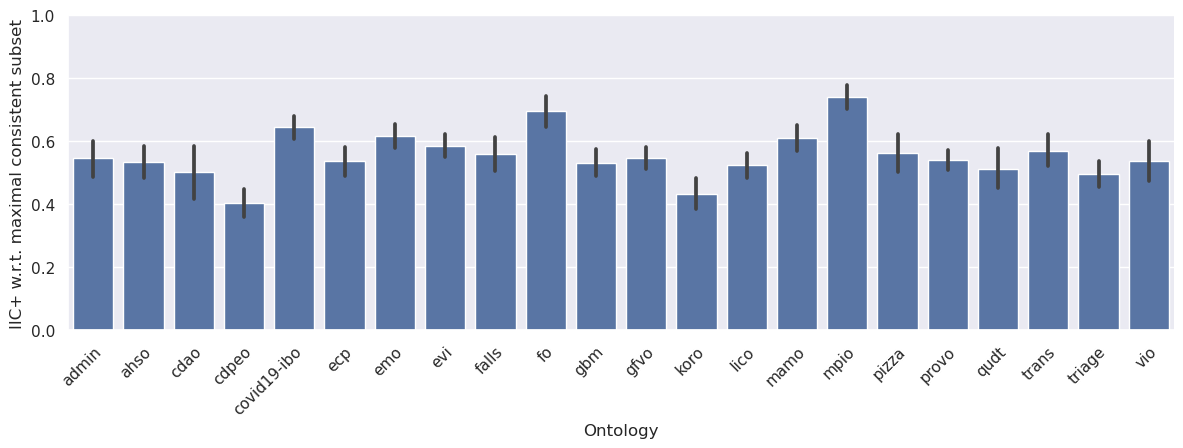

In [9]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC+ w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/eiic-mcs-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['eiic_mcs'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

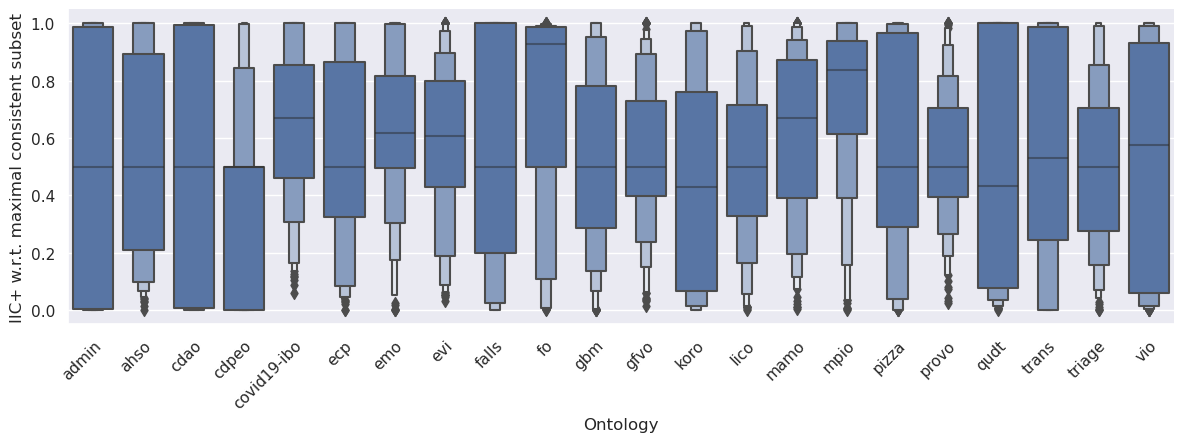

In [10]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC+ w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-mcs-ontology-violin.png', dpi=100, bbox_inches = "tight")

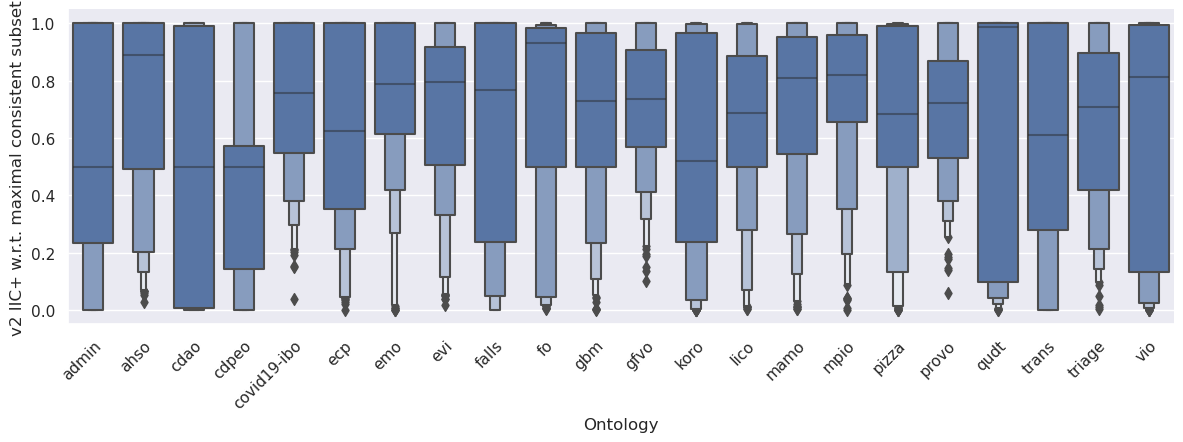

In [11]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC+ w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.59, (0.52, 0.64)), 'ahso': (0.72, (0.67, 0.77)), 'cdao': (0.52, (0.43, 0.61)), 'cdpeo': (0.47, (0.41, 0.52)), 'covid19-ibo': (0.73, (0.69, 0.77)), 'ecp': (0.62, (0.57, 0.67)), 'emo': (0.74, (0.69, 0.78)), 'evi': (0.7, (0.66, 0.75)), 'falls': (0.62, (0.56, 0.68)), 'fo': (0.68, (0.63, 0.74)), 'gbm': (0.68, (0.63, 0.72)), 'gfvo': (0.72, (0.68, 0.75)), 'koro': (0.58, (0.52, 0.63)), 'lico': (0.65, (0.61, 0.7)), 'mamo': (0.71, (0.67, 0.76)), 'mpio': (0.75, (0.7, 0.79)), 'pizza': (0.65, (0.59, 0.72)), 'provo': (0.7, (0.66, 0.73)), 'qudt': (0.62, (0.55, 0.69)), 'trans': (0.61, (0.55, 0.66)), 'triage': (0.64, (0.59, 0.69)), 'vio': (0.61, (0.53, 0.68))}


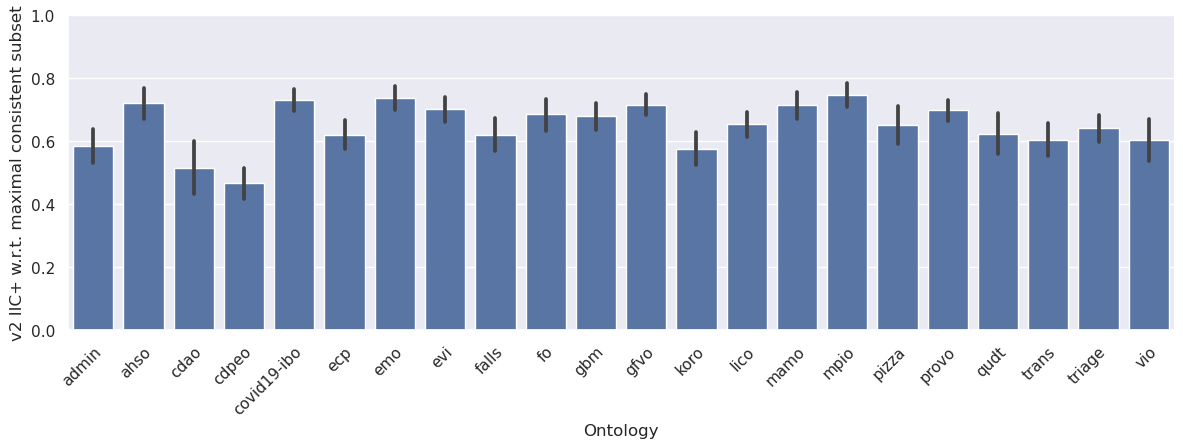

In [12]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC+ w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/eiic-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['eiic_enhance_mcs'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

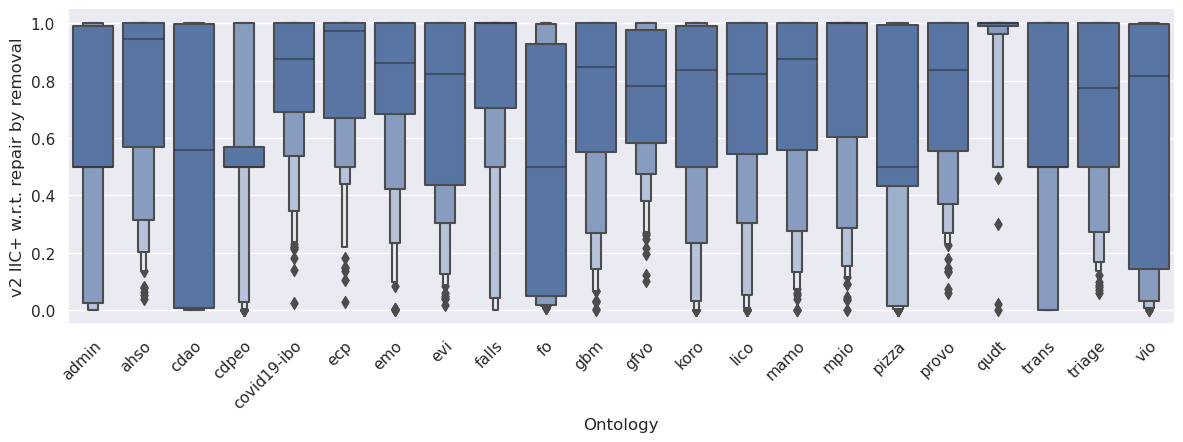

In [13]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC+ w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-enhance-rem-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.57, (0.51, 0.62)), 'ahso': (0.78, (0.73, 0.83)), 'cdao': (0.56, (0.47, 0.65)), 'cdpeo': (0.56, (0.52, 0.6)), 'covid19-ibo': (0.81, (0.77, 0.84)), 'ecp': (0.83, (0.79, 0.87)), 'emo': (0.78, (0.74, 0.82)), 'evi': (0.7, (0.65, 0.75)), 'falls': (0.81, (0.76, 0.86)), 'fo': (0.49, (0.43, 0.55)), 'gbm': (0.73, (0.68, 0.77)), 'gfvo': (0.75, (0.71, 0.79)), 'koro': (0.7, (0.65, 0.75)), 'lico': (0.72, (0.67, 0.77)), 'mamo': (0.74, (0.69, 0.78)), 'mpio': (0.78, (0.74, 0.83)), 'pizza': (0.6, (0.53, 0.66)), 'provo': (0.75, (0.7, 0.79)), 'qudt': (0.95, (0.92, 0.98)), 'trans': (0.61, (0.55, 0.67)), 'triage': (0.7, (0.66, 0.75)), 'vio': (0.61, (0.54, 0.68))}


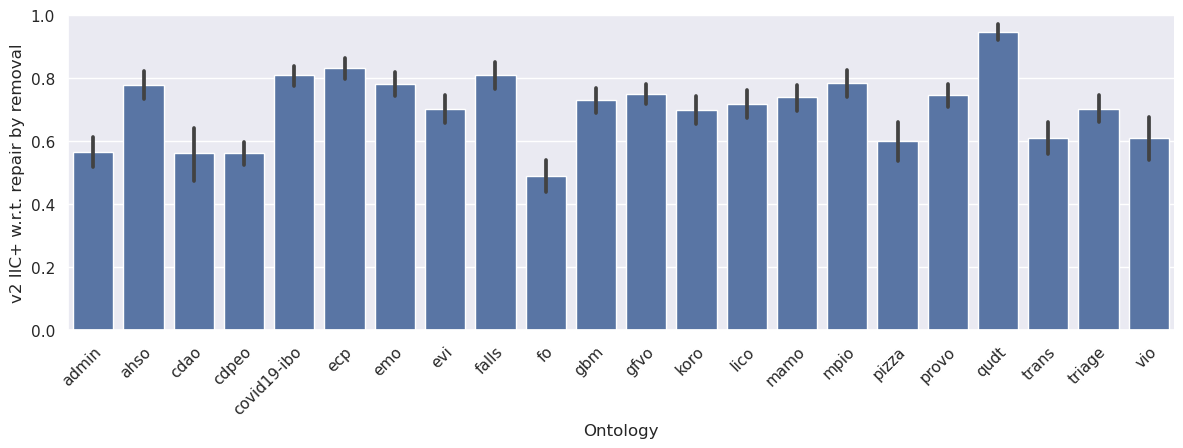

In [14]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC+ w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/eiic-enhance-rem-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['eiic_enhance_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

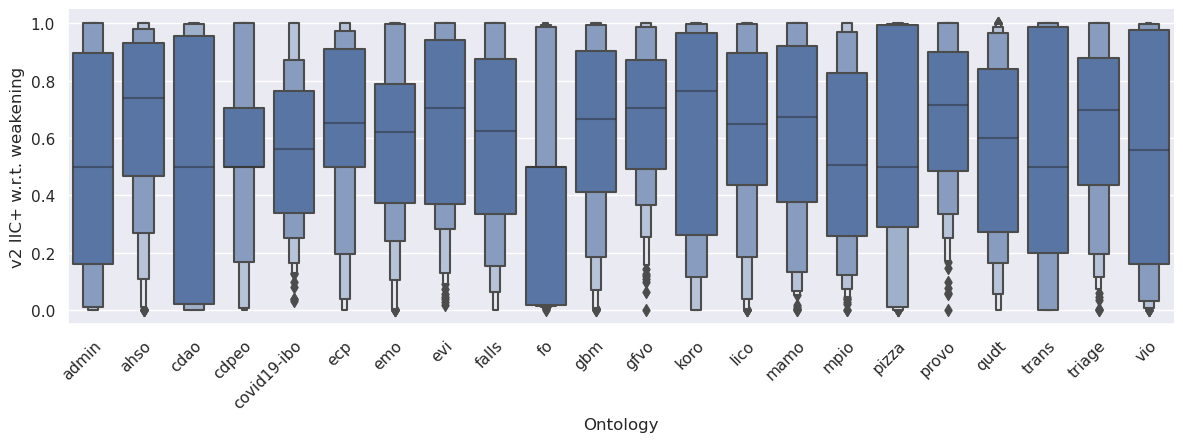

In [15]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC+ w.r.t. weakening', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-enhance-weaken-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.52, (0.47, 0.58)), 'ahso': (0.66, (0.61, 0.71)), 'cdao': (0.53, (0.44, 0.61)), 'cdpeo': (0.55, (0.51, 0.59)), 'covid19-ibo': (0.56, (0.52, 0.6)), 'ecp': (0.61, (0.57, 0.66)), 'emo': (0.6, (0.55, 0.64)), 'evi': (0.65, (0.6, 0.7)), 'falls': (0.6, (0.55, 0.64)), 'fo': (0.44, (0.39, 0.5)), 'gbm': (0.61, (0.57, 0.66)), 'gfvo': (0.67, (0.63, 0.71)), 'koro': (0.63, (0.57, 0.68)), 'lico': (0.63, (0.58, 0.67)), 'mamo': (0.62, (0.57, 0.67)), 'mpio': (0.54, (0.49, 0.59)), 'pizza': (0.56, (0.49, 0.63)), 'provo': (0.68, (0.64, 0.72)), 'qudt': (0.57, (0.52, 0.62)), 'trans': (0.54, (0.48, 0.59)), 'triage': (0.63, (0.58, 0.68)), 'vio': (0.57, (0.5, 0.64))}


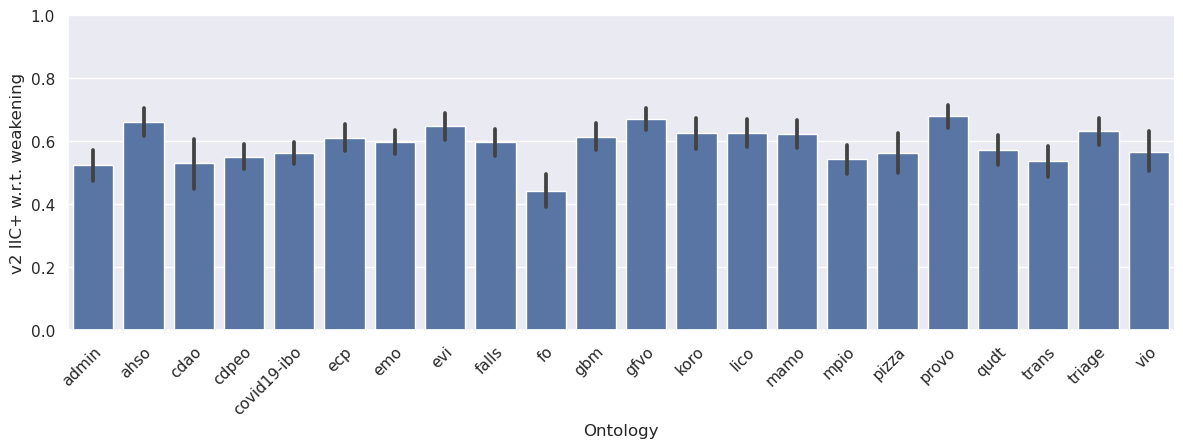

In [16]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC+ w.r.t. weakening', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/eiic-enhance-weaken-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['eiic_enhance_weaken'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

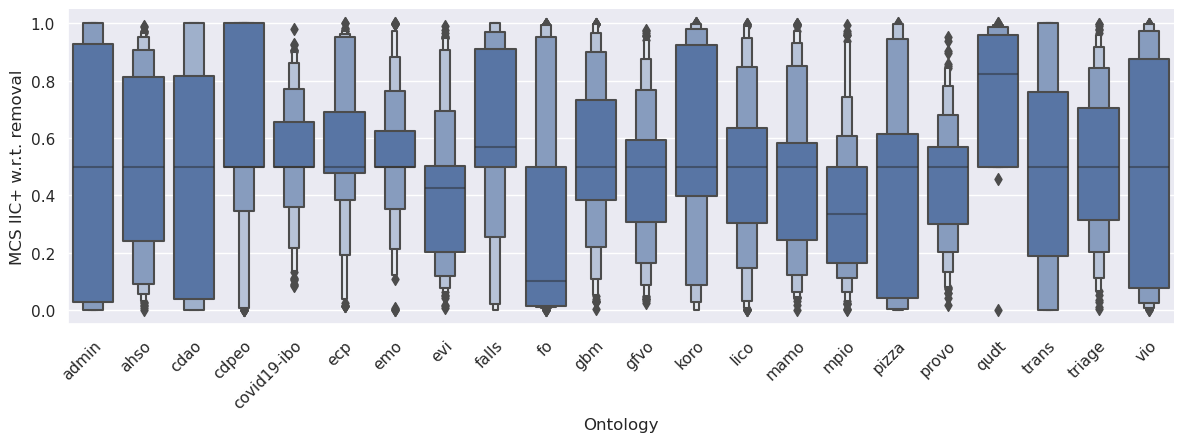

In [17]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='MCS IIC+ w.r.t. removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/eiic-mcs-rem-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.46, (0.4, 0.52)), 'ahso': (0.52, (0.47, 0.57)), 'cdao': (0.47, (0.4, 0.55)), 'cdpeo': (0.59, (0.55, 0.64)), 'covid19-ibo': (0.55, (0.52, 0.58)), 'ecp': (0.58, (0.54, 0.61)), 'emo': (0.54, (0.51, 0.57)), 'evi': (0.42, (0.38, 0.46)), 'falls': (0.61, (0.57, 0.66)), 'fo': (0.33, (0.27, 0.39)), 'gbm': (0.54, (0.5, 0.58)), 'gfvo': (0.48, (0.44, 0.52)), 'koro': (0.59, (0.54, 0.64)), 'lico': (0.49, (0.45, 0.53)), 'mamo': (0.46, (0.42, 0.5)), 'mpio': (0.36, (0.33, 0.4)), 'pizza': (0.46, (0.4, 0.53)), 'provo': (0.45, (0.42, 0.49)), 'qudt': (0.74, (0.7, 0.78)), 'trans': (0.49, (0.44, 0.54)), 'triage': (0.5, (0.46, 0.55)), 'vio': (0.47, (0.4, 0.53))}


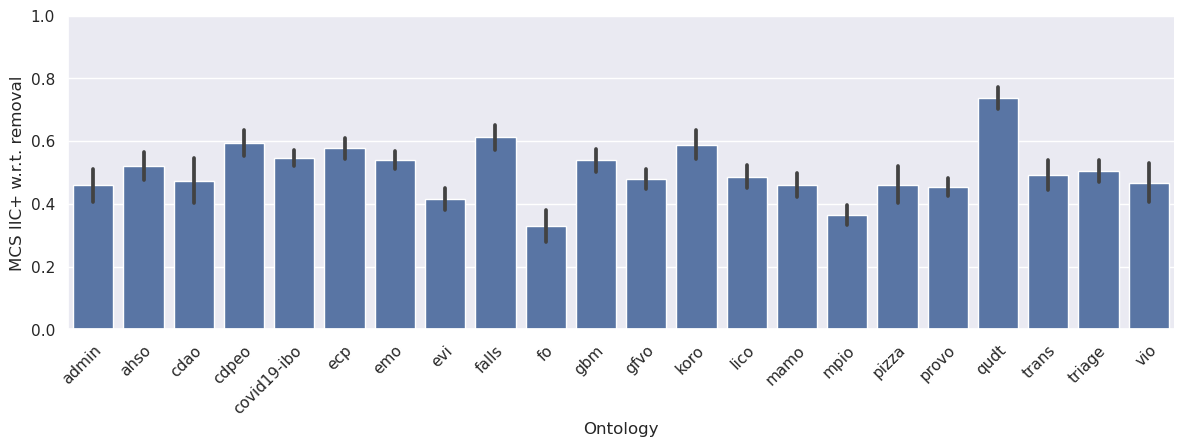

In [18]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='MCS IIC+ w.r.t. removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/eiic-mcs-rem-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['eiic_mcs_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (13867, (13679, 14069)), 'ahso': (20036, (18630, 21451)), 'cdao': (47929, (44768, 51439)), 'cdpeo': (13460, (13436, 13489)), 'covid19-ibo': (21452, (20508, 22384)), 'ecp': (6374, (6232, 6508)), 'emo': (22617, (21664, 23593)), 'evi': (11854, (11293, 12416)), 'falls': (641, (604, 682)), 'fo': (4514, (4223, 4819)), 'gbm': (28158, (27319, 29021)), 'gfvo': (20198, (19750, 20621)), 'koro': (6189, (6111, 6273)), 'lico': (39678, (38395, 40904)), 'mamo': (15928, (15213, 16626)), 'mpio': (2306, (2145, 2475)), 'pizza': (86790, (81999, 91715)), 'provo': (27542, (26450, 28687)), 'qudt': (12990, (12537, 13505)), 'trans': (8006, (7930, 8080)), 'triage': (30495, (28592, 32548)), 'vio': (23958, (21581, 26405))}


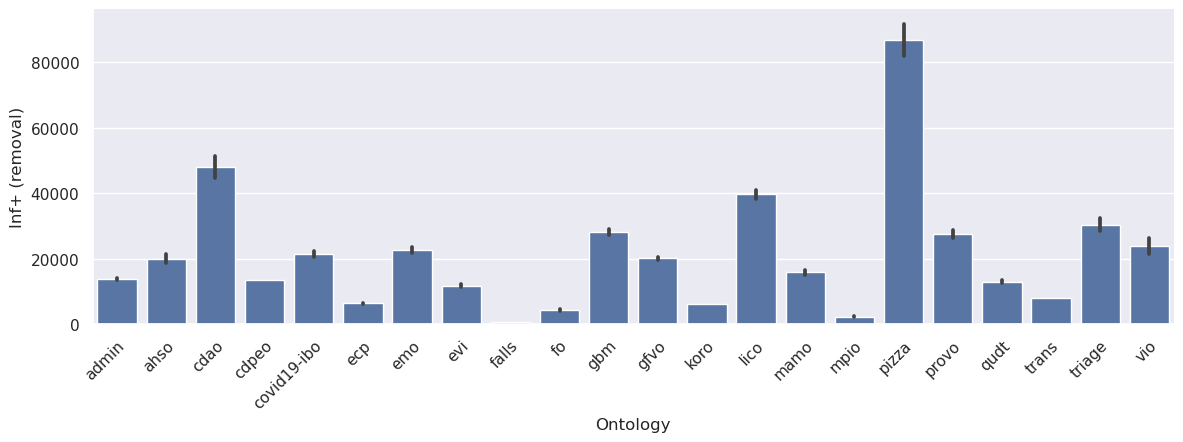

In [19]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inf+ (removal)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['einf_remove'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (14052, (13815, 14308)), 'ahso': (20508, (18976, 22047)), 'cdao': (47751, (44809, 50910)), 'cdpeo': (13535, (13484, 13594)), 'covid19-ibo': (21905, (21020, 22821)), 'ecp': (7047, (6875, 7215)), 'emo': (22887, (21945, 23873)), 'evi': (11366, (10820, 11904)), 'falls': (684, (645, 725)), 'fo': (4434, (4144, 4736)), 'gbm': (28745, (27974, 29501)), 'gfvo': (19909, (19459, 20338)), 'koro': (7074, (6783, 7395)), 'lico': (39777, (38601, 40966)), 'mamo': (15624, (14963, 16252)), 'mpio': (2055, (1913, 2200)), 'pizza': (87752, (83100, 92510)), 'provo': (27144, (26053, 28257)), 'qudt': (13426, (12886, 14034)), 'trans': (8231, (8112, 8350)), 'triage': (30628, (28759, 32641)), 'vio': (23871, (21698, 26068))}


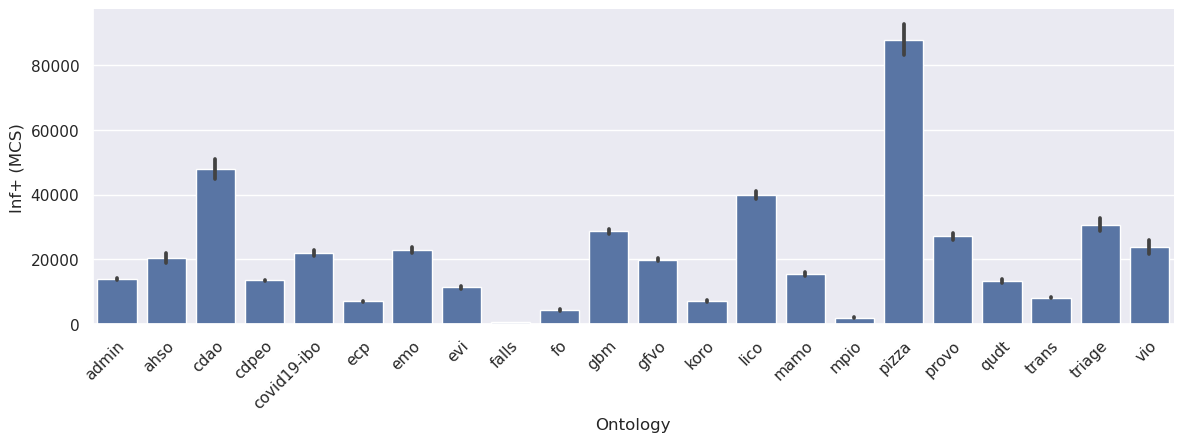

In [20]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inf+ (MCS)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['einf_mcs'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (13997, (13800, 14209)), 'ahso': (19894, (18449, 21376)), 'cdao': (46405, (43664, 49283)), 'cdpeo': (13459, (13432, 13489)), 'covid19-ibo': (22432, (21494, 23376)), 'ecp': (6416, (6271, 6553)), 'emo': (23559, (22601, 24529)), 'evi': (11753, (11176, 12327)), 'falls': (659, (620, 702)), 'fo': (4625, (4327, 4933)), 'gbm': (28591, (27757, 29415)), 'gfvo': (20410, (19998, 20807)), 'koro': (6233, (6141, 6328)), 'lico': (39492, (38250, 40738)), 'mamo': (16789, (16157, 17376)), 'mpio': (2363, (2201, 2536)), 'pizza': (88938, (83921, 93924)), 'provo': (27473, (26431, 28590)), 'qudt': (13087, (12612, 13624)), 'trans': (8073, (7995, 8149)), 'triage': (30248, (28318, 32291)), 'vio': (23936, (21603, 26325))}


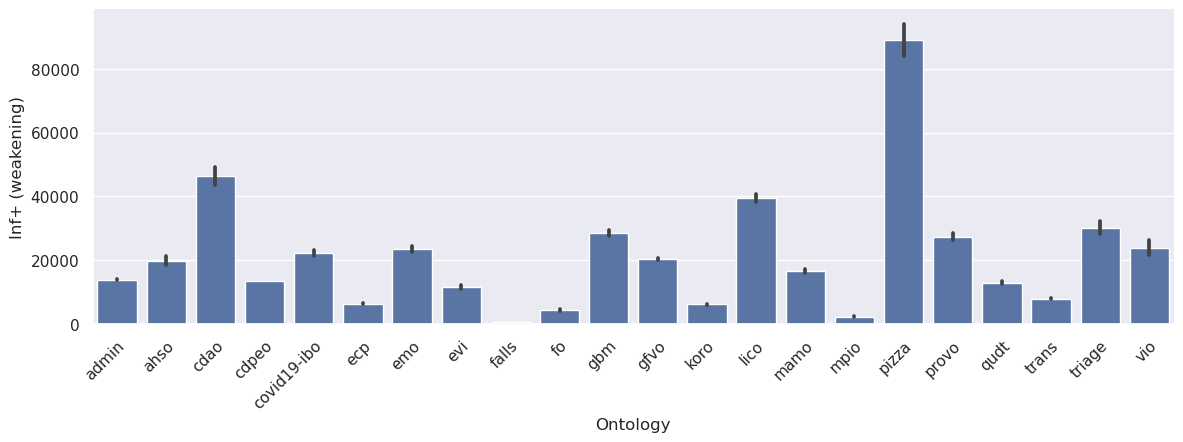

In [21]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inf+ (weakening)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['einf_weakening'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (14090, (13871, 14316)), 'ahso': (21480, (19911, 23104)), 'cdao': (49753, (45987, 53861)), 'cdpeo': (13520, (13473, 13583)), 'covid19-ibo': (22924, (21923, 23936)), 'ecp': (6781, (6616, 6942)), 'emo': (24492, (23507, 25505)), 'evi': (11838, (11295, 12386)), 'falls': (684, (643, 728)), 'fo': (4571, (4278, 4874)), 'gbm': (29672, (28862, 30465)), 'gfvo': (21577, (21232, 21905)), 'koro': (6923, (6656, 7223)), 'lico': (41105, (39954, 42219)), 'mamo': (17061, (16366, 17697)), 'mpio': (2335, (2173, 2504)), 'pizza': (93287, (88428, 98182)), 'provo': (28025, (26972, 29128)), 'qudt': (13218, (12711, 13775)), 'trans': (8179, (8086, 8274)), 'triage': (30818, (28930, 32803)), 'vio': (26354, (24095, 28707))}


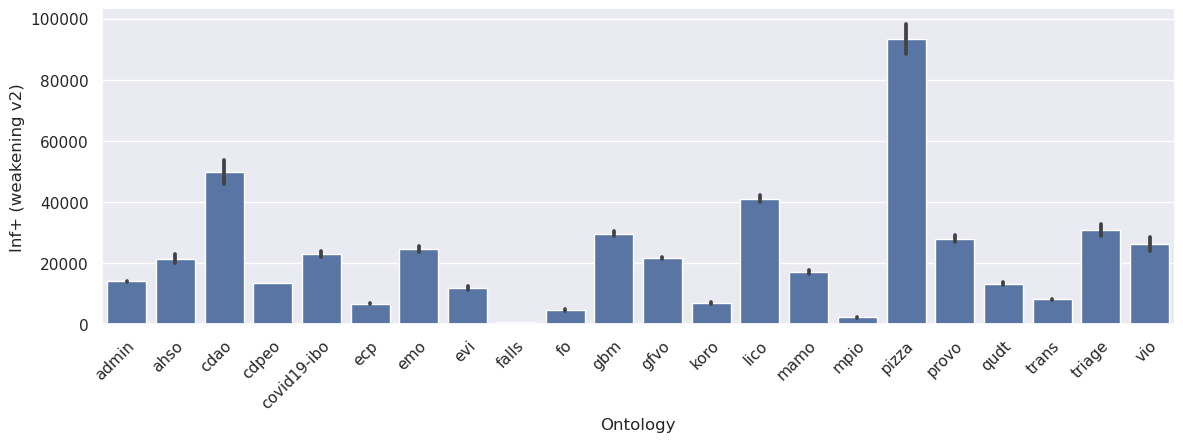

In [22]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inf+ (weakening v2)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['einf_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

eiic_remove 0.63 ((0.61, 0.64),)
eiic_mcs 0.56 ((0.54, 0.57),)
eiic_enhance_remove 0.71 ((0.7, 0.73),)
eiic_enhance_mcs 0.65 ((0.64, 0.67),)
eiic_enhance_weaken 0.59 ((0.58, 0.61),)
eiic_mcs_remove 0.51 ((0.49, 0.52),)


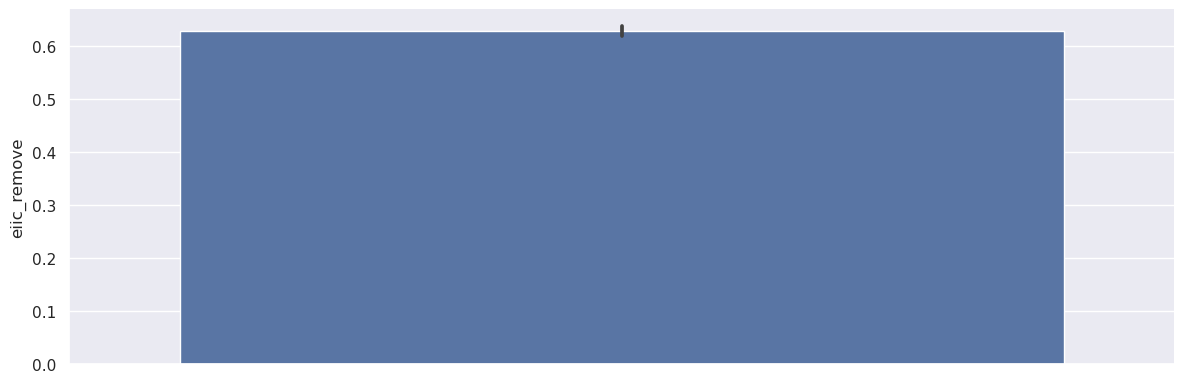

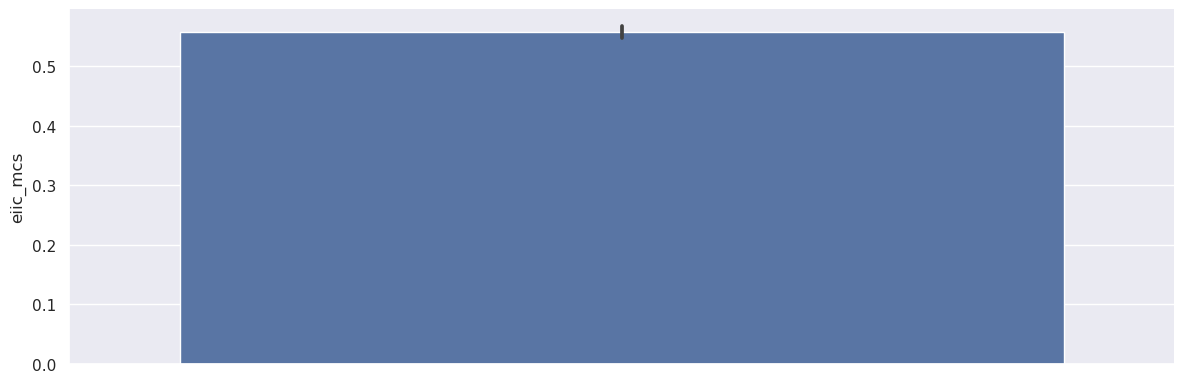

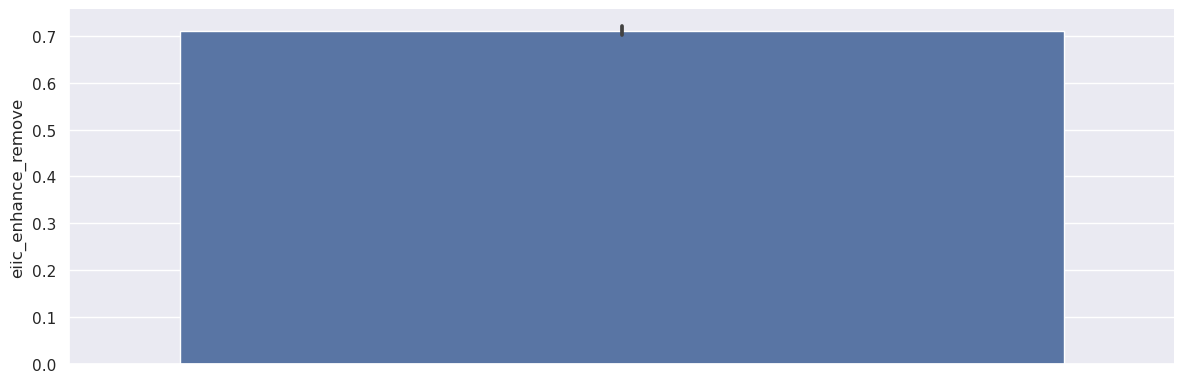

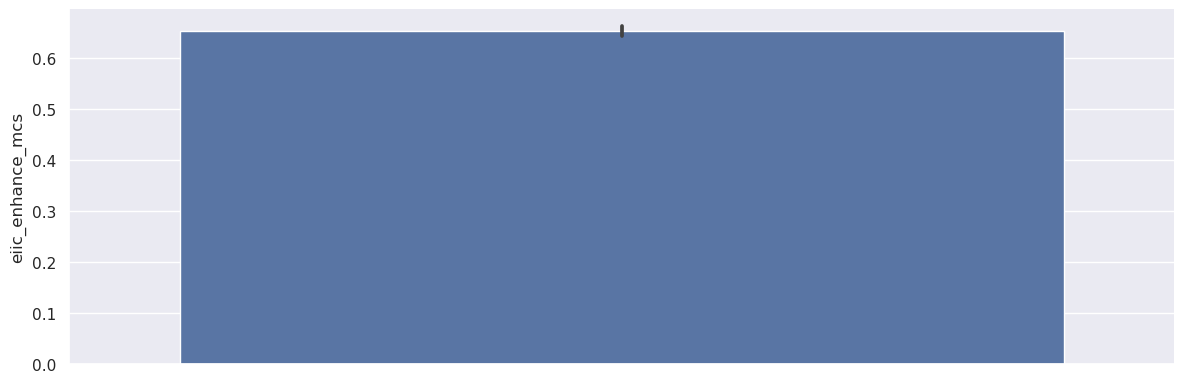

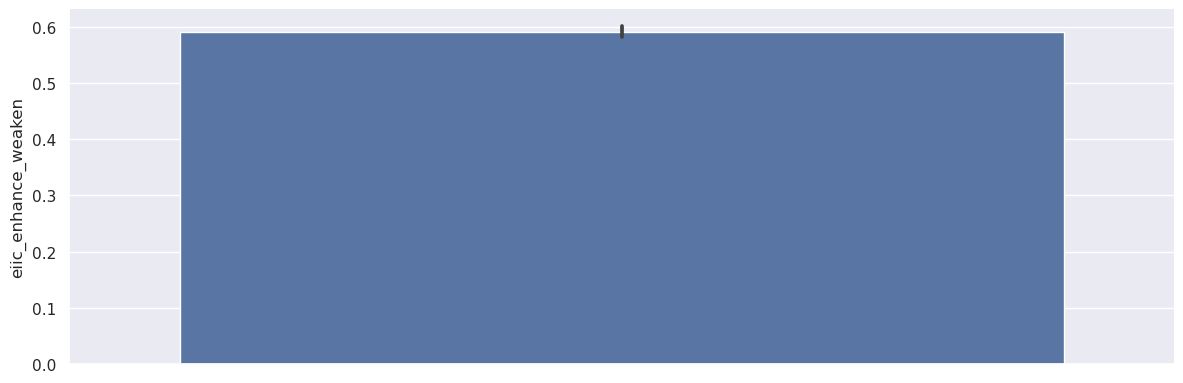

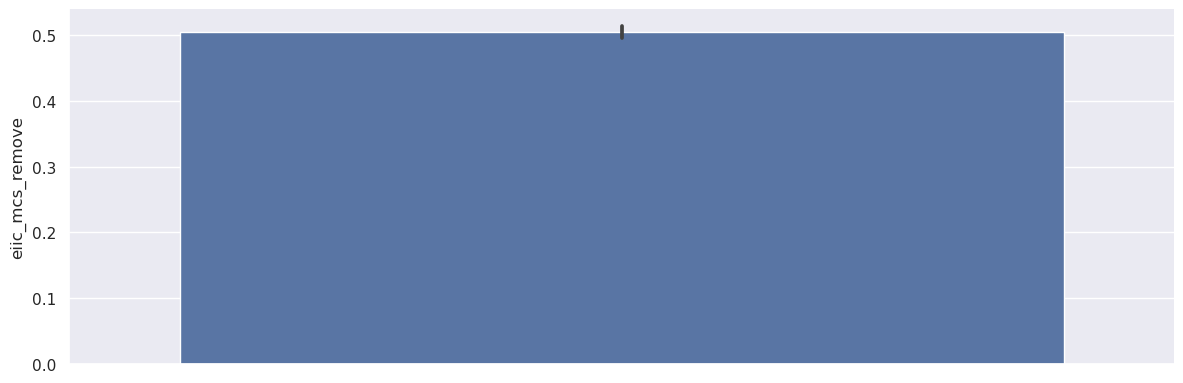

In [23]:
facet = sns.catplot(data=repair_data, kind='bar', y='eiic_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('eiic_remove', round(repair_data['eiic_remove'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='eiic_mcs', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('eiic_mcs', round(repair_data['eiic_mcs'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='eiic_enhance_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('eiic_enhance_remove', round(repair_data['eiic_enhance_remove'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='eiic_enhance_mcs', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('eiic_enhance_mcs', round(repair_data['eiic_enhance_mcs'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='eiic_enhance_weaken', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('eiic_enhance_weaken', round(repair_data['eiic_enhance_weaken'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='eiic_mcs_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('eiic_mcs_remove', round(repair_data['eiic_mcs_remove'].mean(), 2), tuple(zip(lower, upper)))

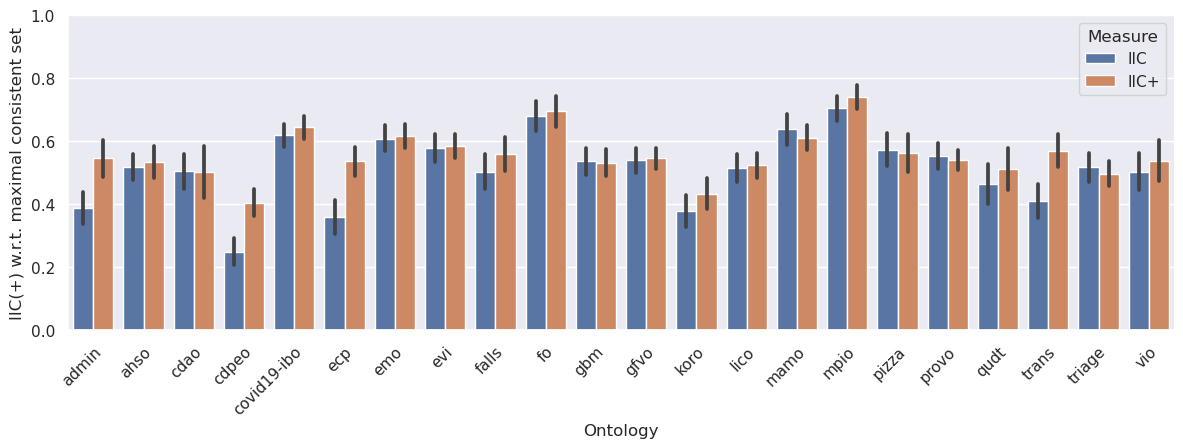

In [26]:
order = np.unique(repair_data['Ontology'])
data = repair_data.melt(['Ontology'], ['IIC w.r.t. maximal consistent subset', 'IIC+ w.r.t. maximal consistent subset'],
            'Measure', 'IIC(+) w.r.t. maximal consistent set')
data['Measure'] = data['Measure'].map({'IIC+ w.r.t. maximal consistent subset': 'IIC+', 'IIC w.r.t. maximal consistent subset': 'IIC'})
sns.catplot(data=data, kind='bar', x='Ontology', y='IIC(+) w.r.t. maximal consistent set', height=4, aspect=3, hue='Measure', order=order, legend_out=False, n_boot=5_000)
plt.ylim((0, 1))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-eiic-mcs-ontology-bar.png', dpi=100, bbox_inches="tight")

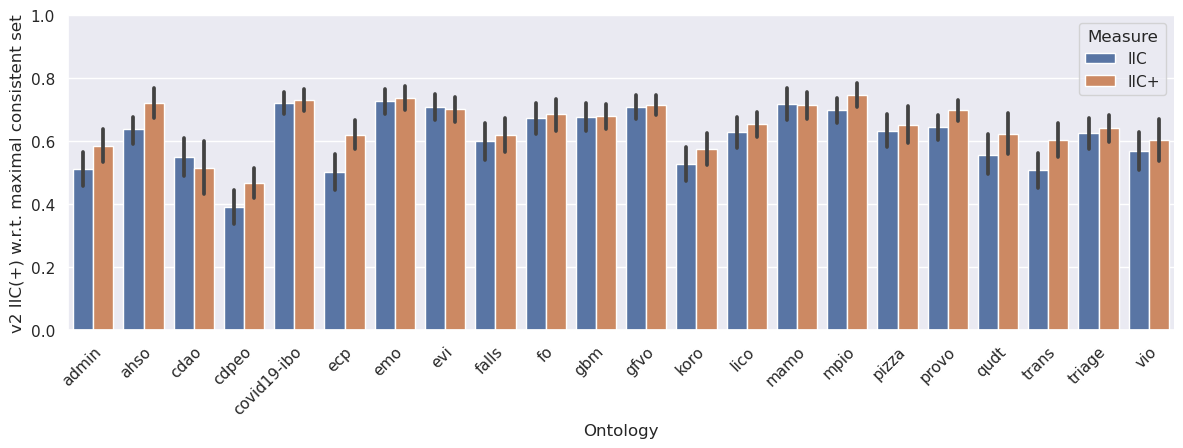

In [27]:
order = np.unique(repair_data['Ontology'])
data = repair_data.melt(['Ontology'], ['v2 IIC w.r.t. maximal consistent subset', 'v2 IIC+ w.r.t. maximal consistent subset'],
            'Measure', 'v2 IIC(+) w.r.t. maximal consistent set')
data['Measure'] = data['Measure'].map({'v2 IIC+ w.r.t. maximal consistent subset': 'IIC+', 'v2 IIC w.r.t. maximal consistent subset': 'IIC'})
sns.catplot(data=data, kind='bar', x='Ontology', y='v2 IIC(+) w.r.t. maximal consistent set', height=4, aspect=3, hue='Measure', order=order, legend_out=False, n_boot=5_000)
plt.ylim((0, 1))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-eiic-enhance-mcs-ontology-bar.png', dpi=100, bbox_inches="tight")

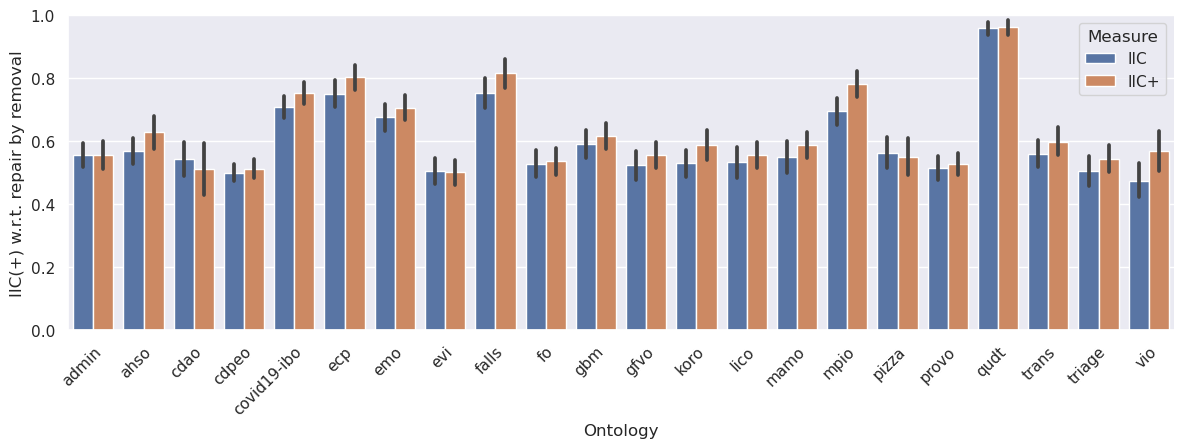

In [28]:
order = np.unique(repair_data['Ontology'])
data = repair_data.melt(['Ontology'], ['IIC w.r.t. repair by removal', 'IIC+ w.r.t. repair by removal'],
            'Measure', 'IIC(+) w.r.t. repair by removal')
data['Measure'] = data['Measure'].map({'IIC+ w.r.t. repair by removal': 'IIC+', 'IIC w.r.t. repair by removal': 'IIC'})
sns.catplot(data=data, kind='bar', x='Ontology', y='IIC(+) w.r.t. repair by removal', height=4, aspect=3, hue='Measure', order=order, legend_out=False, n_boot=5_000)
plt.ylim((0, 1))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-eiic-ontology-bar.png', dpi=100, bbox_inches="tight")